## Data Understanding 

In [104]:
#imports 

import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt 
import seaborn as sns

#stats
from scipy.stats import iqr

In [105]:
cars = pd.read_csv("data/vehicles.csv")

In [106]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


I can read a csv file lol.

## Feature Engineering 

- 'id' doesn't provide any useful information 

In [107]:
# X = cars.drop(['id','region','price','model','title_status','transmission','VIN','size','state'],axis=1)
# y = cars[['price']]

In [108]:
cars.drop(['id','region','model','title_status','transmission','VIN','size','state'],axis=1,inplace=True)

In [109]:
cars.price.astype('int')

0          6000
1         11900
2         21000
3          1500
4          4900
          ...  
426875    23590
426876    30590
426877    34990
426878    28990
426879    30590
Name: price, Length: 426880, dtype: int64

In [110]:
#Interquartile range of price 
#iqr(cars.price,rng=[10,90])

# q90, q10 = np.percentile(cars['price'], [90 ,10])
# print(q90-q10)

In [111]:
# iqr(cars.price,rng=[10,90])

<AxesSubplot:xlabel='price'>

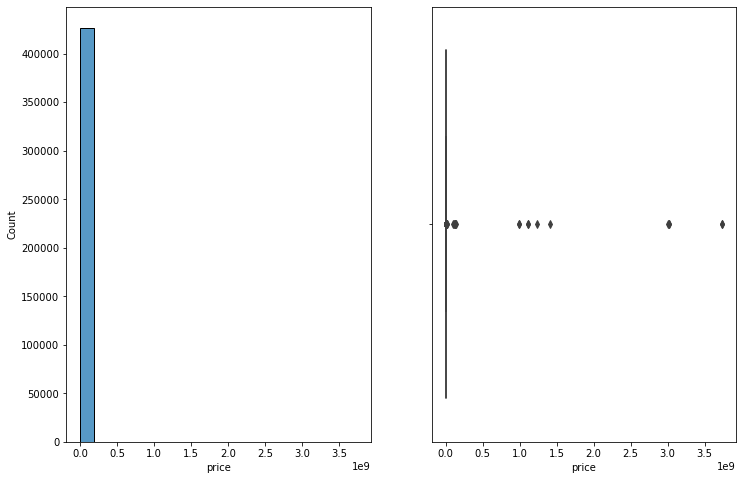

In [112]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.histplot(data=cars,x='price',bins=20)
plt.subplot(122)
sns.boxplot(data=cars,x='price')

The prices of the cars in our dataset are heavily skewed. Removing the outliers.

In [113]:
#Looking at the interquartile range of Price 
q90, q10 = np.percentile(cars['price'], [90 ,10])
print('Row count before:',cars.shape[0])
cars = cars[cars['price'].between(q10,q90)]
print('Row count after:',cars.shape[0])

Row count before: 426880
Row count after: 342632


<AxesSubplot:xlabel='price'>

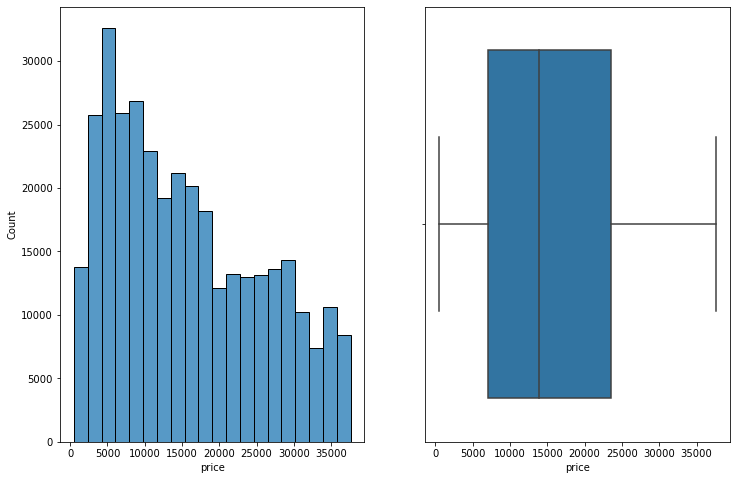

In [126]:
#plotting prices again
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.histplot(data=cars,x='price',bins=20)
plt.subplot(122)
sns.boxplot(data=cars,x='price')